# Rainfall Weather Forecasting
Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset Link-  
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
•	https://github.com/dsrscientist/dataset3


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
# Load LHS data
RWF = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
RWF.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [3]:
print(RWF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

We used the info() method to display information about the dataset. It provides details about the number of non-null values, data types, and memory usage for each column.
From the output, you can see that there are 8,425 entries in the dataset with 23 columns.
It also shows the data types of each column, the number of non-null values, and the memory usage.

In [11]:
print(RWF.columns)

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


Output shows that the dataset contains a mix of numeric (float64) and object (string) data types, and there are missing values in some columns. The next steps in this project may include handling missing data, converting date-related columns to datetime objects, and performing further data preprocessing as needed before building machine learning models.

In [13]:
# Handle missing values
RWF.dropna(subset=['RainTomorrow'], inplace=True)  # Remove rows with missing target variable
RWF.fillna(RWF.mean(), inplace=True)  # Impute missing values with the mean (you can choose a different strategy)

# Handle missing values
Removed rows where the "RainTomorrow" column has missing values. This makes sense because using "RainTomorrow" as target variable for prediction, and cannot make predictions without it.

Filled the remaining missing values in the dataset with the mean of each respective column. This is a common strategy for imputing missing numeric values.
It's important to note that imputing with the mean can introduce bias, especially if there are many missing values in a particular column. Depending on the column and the nature of the data, you may consider other imputation strategies like median, mode, or even more advanced methods.
After handling missing values, we can proceed with other data preprocessing steps, such as converting date-related columns to datetime objects (if needed), encoding categorical variables, and splitting the data into training and testing sets.

In [4]:
RWF.dropna(subset=['RainTomorrow'], inplace=True)  # Remove rows with missing target variable
RWF.drop(['Date'], axis=1, inplace=True)  # Date column is not needed for prediction

# In these additional steps, made further modifications to your dataset:
Removed rows with missing values in the "RainTomorrow" column. This is a reasonable step because "RainTomorrow" is your target variable, and cannot make predictions without it.

 dropped the "Date" column from the dataset. If don't plan to use the date as a feature for prediction, removing it can reduce the complexity of dataset and make it more suitable for machine learning algorithms.
With these modifications, you are progressing towards preparing your data for machine learning modeling. The next steps typically involve encoding categorical variables (if there are any left), splitting the data into features (X) and the target variable (y), and further data preprocessing or feature engineering if needed.

In [6]:
le = LabelEncoder()
categorical_columns = RWF.select_dtypes(include=['object']).columns
for col in categorical_columns:
    RWF[col] = le.fit_transform(RWF[col])

In this code snippet, you've used a LabelEncoder to encode categorical columns in your dataset. This is a common preprocessing step when working with machine learning algorithms, as they typically require numeric inputs. 

le = LabelEncoder(): 
created an instance of the LabelEncoder class, which will be used to perform label encoding.

categorical_columns = RWF.select_dtypes(include=['object']).columns: Identified the columns with object data types, which typically represent categorical variables. This step ensures that only apply label encoding to the appropriate columns.

for col in categorical_columns::  Looped through each of the categorical columns.

RWF[col] = le.fit_transform(RWF[col]): For each categorical column, applied the fit_transform method of the LabelEncoder to convert the categorical values into numeric values. This operation replaces the original categorical values with encoded integer values.

After this label encoding step, your dataset should have all numeric values, which is necessary for most machine learning algorithms. I can now proceed with splitting the data into features (X) and the target variable (y) and then move on to model building, training, and evaluation.

In [7]:
X = RWF.drop(['RainTomorrow'], axis=1)
y = RWF['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Successfully split data into features (X) and the target variable (y), as well as further divided it into training and testing sets.

X = RWF.drop(['RainTomorrow'], axis=1): created the feature matrix X by dropping the "RainTomorrow" column from your dataset. This matrix contains all the predictor variables.

y = RWF['RainTomorrow']: created the target variable y by selecting the "RainTomorrow" column. This will be the variable you're trying to predict.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): You've used train_test_split to split your data into training and testing sets. The test_size parameter is set to 0.2, which means 20% of the data will be used for testing, and the remaining 80% will be used for training. The random_state parameter is set to 42 to ensure reproducibility.

Now that i have my data split, i can proceed with building and training machine learning models on the training set and then evaluate their performance on the testing set. 

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Applied feature scaling to training and testing data using the StandardScaler. This is a good practice, especially when working with machine learning algorithms that are sensitive to the scale of input features

In [17]:
imputer = SimpleImputer(strategy='mean')

In [18]:
X_train_imputed = imputer.fit_transform(X_train)

In [19]:
X_test_imputed = imputer.transform(X_test)

In [20]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

# RandomForestClassifier
Created an instance of the RandomForestClassifier class with random_state=42, which sets the random seed for reproducibility. Then trained the random forest classifier on this training data.

In [22]:
y_pred = rf_classifier.predict(X_test_imputed)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9047619047619048


In [25]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1248
           1       0.89      0.68      0.77       390

    accuracy                           0.90      1638
   macro avg       0.90      0.83      0.86      1638
weighted avg       0.90      0.90      0.90      1638

Confusion Matrix:
 [[1216   32]
 [ 124  266]]


In [27]:
feature_importances = rf_classifier.feature_importances_
feature_names = RWF.drop(['RainTomorrow'], axis=1).columns
sorted_idx = np.argsort(feature_importances)

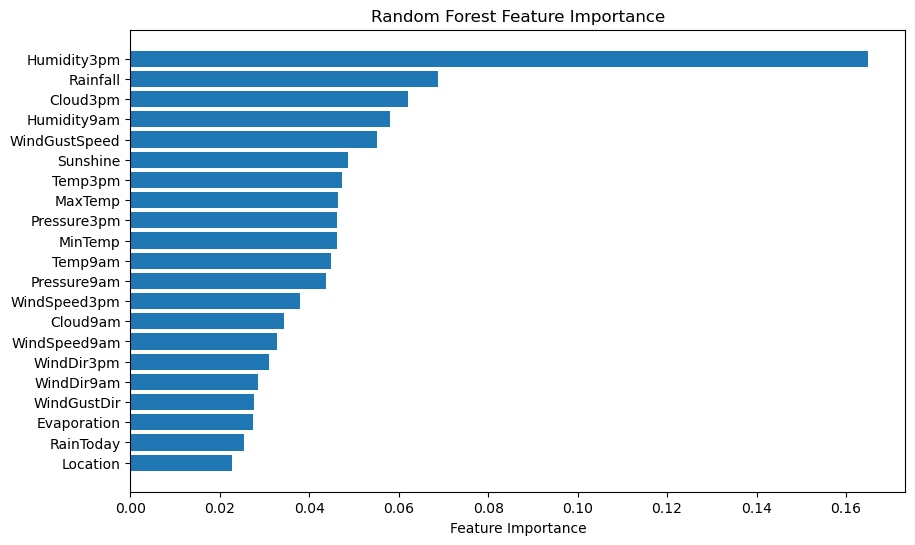

In [28]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

# successfully created a horizontal bar chart to visualize the feature importances from random forest classifier. This visualization helps and understand which features are the most important for making predictions. 



This bar chart provides a clear visualization of feature importances, allowing you to identify which features have the most influence on the model's predictions. Features with higher bars are more important, while those with lower bars have less influence.